In [11]:
import keras
import pandas as pd
import tensorflow as tf

import numpy as np
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D, Input,AveragePooling2D, BatchNormalization, LeakyReLU, SpatialDropout2D

# from keras.applications import MobileNet
# from keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

from collections import defaultdict,Counter
# from imblearn.over_sampling import SMOTE
from PIL import Image

# from kerastuner import HyperModel

In [12]:

def getSpeciesCode(x):
    part = x.split('_')
    if part[0] == 'ASETRI':
        return 0
    elif part[0] == 'EPTBOT':
        return 1
    elif part[0] == 'MYOEMA':
        return 2
    elif part[0] == 'PIPKUH':
        return 3
    elif part[0] == 'RHIMUS':
        return 4
    elif part[0] == 'RHYNAS':
        return 5
    elif part[0] == 'ROUAEG':
        return 6
    elif part[0] == 'TAPPER':
        return 7
    else:
        return 'Unknown'
    
def getSpecies(x):
    if x == 0:
        return 'A.tridens'
    elif x == 1:
        return 'E.bottae'
    elif x == 2:
        return 'M.emarginatus'
    elif x == 3:
        return 'P.kuhli'
    elif x == 4:
        return 'R.muscatellum'
    elif x == 5:
        return 'R.nasutus'
    elif x == 6:
        return 'R.aegyptius'
    elif x == 7:
        return 'T.perforatus'
    else:
        return 'Unknown'
    

def generate_actual_predicted(Y_pred, Y_test): 
    predicted = list()
    for i in range(len(Y_pred)):
        predicted.append(np.argmax(Y_pred[i]))
        
    actual = list()
    for i in range(len(Y_test)):
        actual.append(np.argmax(Y_test[i]))
        
    return actual, predicted


In [13]:
from keras.utils import np_utils
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix

n_split=10
n_classes=9
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
n_classes=8


In [14]:
# loading a test image
import os
from PIL import Image

X_all = []
Y_all = []

image_folder_path = r'C:\\Users\\pinkb\\OneDrive\\Documents\\Spring 2020\\Deep Learning\\batsproject\\GitRepository\\SpectogramInitial'
file_paths = [f for f in os.listdir(image_folder_path)]

for file_name in file_paths:
    spectrogram = Image.open(image_folder_path + '/' + file_name)
    spectrogram = spectrogram.convert('RGB')
    spectrogram = spectrogram.resize((170, 112))  
    spectrogram = np.array(spectrogram)
    #spectrogram = np.expand_dims(spectrogram, axis=2) 
    X_all.append(spectrogram)
    Y_all.append(getSpeciesCode(file_name))
    

    
X_all = np.array(X_all)
Y_all = np.array(Y_all)



X_all = X_all.astype('float32')
X_all /= 255

Y_all = np_utils.to_categorical(Y_all, num_classes=8) 


print(X_all.shape)
print(Y_all.shape)

(3018, 112, 170, 3)
(3018, 8)


In [15]:
import numpy as np
images=r'C:\\Users\\pinkb\\OneDrive\\Documents\\Spring 2020\\Deep Learning\\batsproject\\GitRepository\\ClassifyBatsAudio\\SpectogramInitial'
# results_folder=r'C:\\Users\\pinkb\\OneDrive\\Documents\\Spring 2020\\Deep Learning\\batsproject\\GitRepository\\ClassifyBatsAudio\\TfLite+TensorRT\\TensorRT\\result\\'

actual= np.load('y_actual_jetson_Trial2.npy', allow_pickle= True)
predicted =np.load('y_pred_jetson_Trial2.npy', allow_pickle= True)

np.unique(actual)


array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [16]:
from sklearn.model_selection import StratifiedKFold

target_iter = 1
curr_iter = 1

X_test = []
Y_test = []

index=[]

y_all_labelled=[]
for i in range(len(Y_all)):
        y_all_labelled.append(np.argmax(Y_all[i]))
for train_index,test_index in StratifiedKFold(10, shuffle=True, random_state=123).split(X_all,actual):  
    # use the index to generate  testing sets
    index=test_index 
    if target_iter == curr_iter:
        break

In [17]:
# selected Y_pred
Y_predicted=[]
Y_actual=[]

for i in index:
    Y_predicted.append( predicted [i])
    Y_actual.append(actual [i])
    
Y_predicted=np.array(Y_predicted)
print(Y_predicted.shape)


(302,)


In [18]:
Y_predicted_ohe= np_utils.to_categorical(Y_predicted, num_classes=8) 
Y_test=np_utils.to_categorical(Y_actual, num_classes=8) 

In [19]:
Y_predicted_ohe.shape, Y_test.shape

((302, 8), (302, 8))

In [20]:
Y_predicted [1:10], Y_actual[1:10]

(array([5, 4, 4, 4, 6, 4, 7, 4, 7], dtype=int64), [5, 4, 4, 4, 6, 4, 7, 4, 7])

In [32]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix

n_split=10
n_classes=8
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
n_classes=8
    

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
n_classes=8
    
#generate predictions
actual, predicted = generate_actual_predicted(Y_predicted_ohe, Y_test)

#calc metrics
curr_base_prec, curr_base_rec, curr_f1, _ = precision_recall_fscore_support(actual, predicted)
curr_macro_prec = precision_score(actual, predicted,average='macro')
curr_macro_rec = recall_score(actual, predicted,average='macro')
curr_macro_f1 = f1_score(actual, predicted,average='macro')

actual_labeled = list()
predict_labeled = list()
for x,y in zip(actual,predicted):
    actual_labeled.append(getSpecies(x))
    predict_labeled.append(getSpecies(y))

labels = ['A.tridens','E.bottae','M.emarginatus','P.kuhli','R.muscatellum','R.nasutus', 'R.aegyptius', 'T.perforatus']
curr_cm=confusion_matrix(actual_labeled,predict_labeled,labels=labels)

curr_fpr = [0] * n_classes
curr_tpr = [0] * n_classes
for i in range(n_classes):
    curr_fpr[i], curr_tpr[i], _ = roc_curve(Y_test[:,i], Y_predicted_ohe[:,i])

curr_prec = [0] * n_classes
curr_rec = [0] * n_classes
for i in range(n_classes):
    curr_prec[i], curr_rec[i], _ = precision_recall_curve(Y_test[:,i], Y_predicted_ohe[:,i])


curr_accuracy = accuracy_score(actual, predicted)

    
    
curr_base_prec, curr_base_rec, curr_f1, _ = precision_recall_fscore_support(actual, predicted)
curr_macro_prec = precision_score(actual, predicted,average='macro')
curr_macro_rec = recall_score(actual, predicted,average='macro')
curr_macro_f1 = f1_score(actual, predicted,average='macro')

actual_labeled = list()
predict_labeled = list()
for x,y in zip(actual,predicted):
    actual_labeled.append(getSpecies(x))
    predict_labeled.append(getSpecies(y))

curr_fpr = [0] * n_classes
curr_tpr = [0] * n_classes
for i in range(n_classes):
    curr_fpr[i], curr_tpr[i], _ = roc_curve(Y_test[:,i], Y_predicted_ohe[:,i])

curr_prec = [0] * n_classes
curr_rec = [0] * n_classes
for i in range(n_classes):
    curr_prec[i], curr_rec[i], _ = precision_recall_curve(Y_test[:,i], Y_predicted_ohe[:,i])


curr_accuracy = accuracy_score(actual, predicted)




In [27]:
print('precision by class', curr_base_prec)

print('macro precision',curr_macro_prec)

print('recall by class', curr_base_rec)

print('macro recall', curr_macro_rec)

print('f1 by class', curr_f1)

print('macro f1', curr_macro_f1)

print('accuracy', curr_accuracy)


precision by class [1.         0.92857143 1.         0.96774194 0.95977011 1.
 1.         1.        ]
macro precision 0.9820104348747285
recall by class [1.         1.         1.         1.         1.         0.88888889
 0.91666667 0.875     ]
macro recall 0.9600694444444444
f1 by class [1.         0.96296296 1.         0.98360656 0.97947214 0.94117647
 0.95652174 0.93333333]
macro f1 0.9696341505193099
accuracy 0.9701986754966887


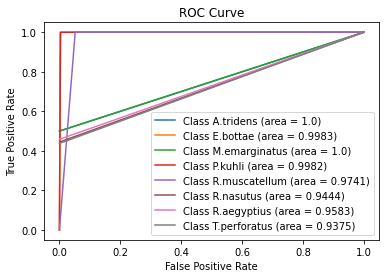

In [28]:
_, axs = plt.subplots(ncols=1)
axs.set(xlabel='False Positive Rate',ylabel='True Positive Rate', title='ROC Curve')
for j in range(n_classes):
    auc_val = auc(curr_fpr[j], curr_tpr[j])
    auc_val = np.around(auc_val,4)
    sns.lineplot(x=curr_fpr[j],y=curr_tpr[j],ax=axs, label='Class '+ getSpecies(j) +' (area = ' + str(auc_val) + ')', legend='brief')


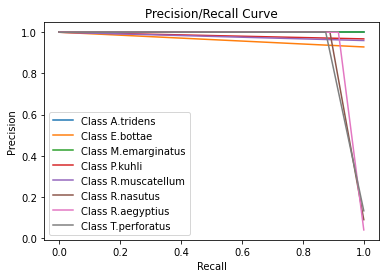

In [29]:
_, axs = plt.subplots(ncols=1)
axs.set(xlabel='Recall',ylabel='Precision', title='Precision/Recall Curve')
for j in range(n_classes):
    sns.lineplot(x=curr_rec[j],y=curr_prec[j],ax=axs, label='Class '+ getSpecies(j), legend='brief')

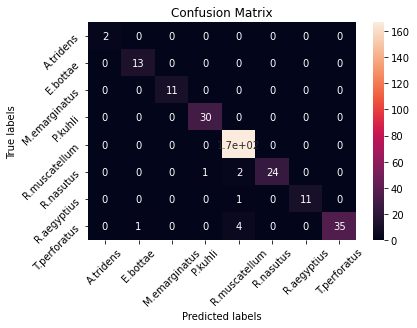

In [33]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt

_, ax = plt.subplots(ncols=1)

sns.heatmap(curr_cm, annot=True); #annot=True to annotate cells


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
print (curr_cm)

[[  2   0   0   0   0   0   0   0]
 [  0  13   0   0   0   0   0   0]
 [  0   0  11   0   0   0   0   0]
 [  0   0   0  30   0   0   0   0]
 [  0   0   0   0 167   0   0   0]
 [  0   0   0   1   2  24   0   0]
 [  0   0   0   0   1   0  11   0]
 [  0   1   0   0   4   0   0  35]]


In [35]:
cm = [
    [2,0,0,0,0,0,0,0],
    [0,13,0,0,0,0,0,0],
    [0,0,11,0,0,0,0,0],
    [0,0,0,30,0,0,0,0],
    [0,0,0,0,167,0,0,0],
    [0,0,0,1,2,24,0,0],
    [0,0,0,0,1,0,11,0],
    [0,1,0,0,4,0,0,35],
     ]
cm = np.array(cm)

[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.04 0.07 0.89 0.   0.  ]
 [0.   0.   0.   0.   0.08 0.   0.92 0.  ]
 [0.   0.02 0.   0.   0.1  0.   0.   0.88]]


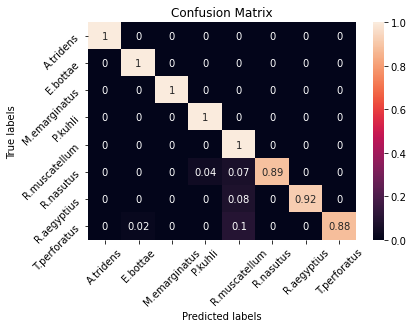

In [36]:
cm= cm/ cm.astype(np.float).sum(axis=1,keepdims = True)



cm = (np.around(cm,2))
print(cm)


labels = ['A.tridens','E.bottae','M.emarginatus','P.kuhli','R.muscatellum','R.nasutus', 'R.aegyptius', 'T.perforatus']


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);